# Support Vector Classifier

In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# Creating the synethetic data points

from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_samples = 2000, n_features = 2, n_classes=2, n_clusters_per_class=2,n_redundant = 0)
X

array([[ 1.05695905,  0.68108691],
       [ 0.95515168, -1.27620595],
       [ 0.69739507,  0.88370838],
       ...,
       [-1.92551059, -0.00500182],
       [-1.66968392,  1.74230068],
       [-0.87289933,  0.7846849 ]])

In [4]:
y

array([1, 1, 1, ..., 0, 1, 1])

In [5]:
pd.DataFrame(X)[0]

0       1.056959
1       0.955152
2       0.697395
3      -2.213709
4      -0.334184
          ...   
1995   -0.399262
1996   -0.791360
1997   -1.925511
1998   -1.669684
1999   -0.872899
Name: 0, Length: 2000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

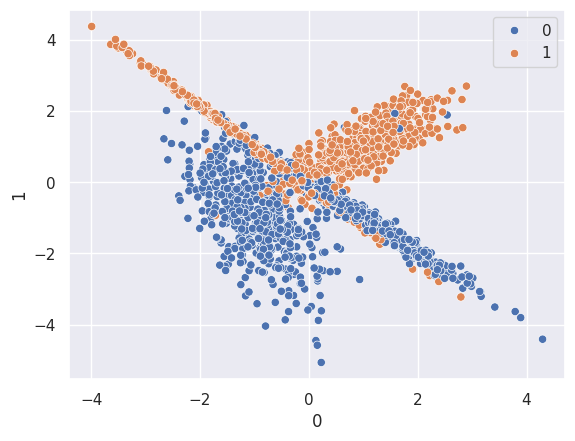

In [6]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1],hue=y)

In [7]:
from sklearn.model_selection import train_test_split
svc_x_train,svc_x_test,svc_y_train,svc_y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [8]:
print(svc_x_train.shape)
print(svc_y_train.shape)
print(svc_x_test.shape)
print(svc_y_test.shape)

(1600, 2)
(1600,)
(400, 2)
(400,)


In [9]:
# Model Building

from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc

SVC(kernel='linear')

In [10]:
# Fit the model

svc.fit(svc_x_train, svc_y_train)

SVC(kernel='linear')

In [11]:
svc.coef_

array([[0.97359213, 2.00227652]])

In [12]:
# Prediction

y_pred = svc.predict(svc_x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_pred,svc_y_test))
print(confusion_matrix(y_pred,svc_y_test))
print(accuracy_score(y_pred,svc_y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       209
           1       0.85      0.90      0.87       191

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

[[178  31]
 [ 20 171]]
0.8725


In [14]:
# Hyperparameter Tuning with Support Vector Classifier

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['linear']}

In [15]:
svc_grid = GridSearchCV(SVC(),param_grid=param_grid, refit=True, cv=5, verbose=3)
svc_grid.fit(svc_x_train,svc_y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.881 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.841 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.866 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.894 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.859 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.881 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.841 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.866 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.894 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.859 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.881 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [16]:
svc_grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [17]:
#Prediction

svcgrid_y_pred = svc_grid.predict(svc_x_test)
print(classification_report(svcgrid_y_pred,svc_y_test))
print(confusion_matrix(svcgrid_y_pred,svc_y_test))
print(accuracy_score(svcgrid_y_pred,svc_y_test))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       211
           1       0.85      0.90      0.87       189

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

[[180  31]
 [ 18 171]]
0.8775


# Support Vector Regressor

In [18]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples = 1000, n_features = 2, n_targets = 1, noise = 3.0)
X

array([[ 0.2784025 ,  0.49881498],
       [-0.19234822,  1.59824491],
       [ 0.09965929,  0.54597937],
       ...,
       [ 0.81030923,  1.5990511 ],
       [ 1.05786772, -0.89470601],
       [-0.66447706,  1.05432446]])

In [19]:
y.shape

(1000,)

In [20]:
pd.DataFrame(X)[0]

0      0.278403
1     -0.192348
2      0.099659
3      1.160964
4      1.662026
         ...   
995    1.298172
996    0.976773
997    0.810309
998    1.057868
999   -0.664477
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

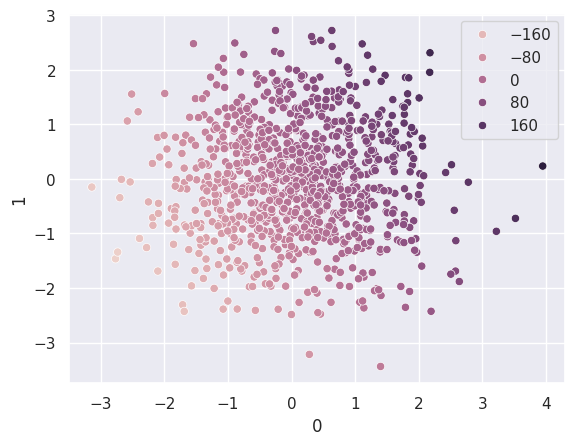

In [21]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue=y)

In [22]:
svr_x_train,svr_x_test,svr_y_train,svr_y_test = train_test_split(X,y,test_size = 0.25,random_state = 29)

In [23]:
print(svr_x_train.shape)
print(svr_x_test.shape)
print(svr_y_train.shape)
print(svr_y_test.shape)

(750, 2)
(250, 2)
(750,)
(250,)


In [24]:
# Model Building

from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr

SVR(kernel='linear')

In [25]:
svr.fit(svr_x_train,svr_y_train)

SVR(kernel='linear')

In [26]:
print(svr.coef_)

[[58.16536362 33.02925972]]


In [27]:
# Prediction

svr_y_pred = svc_grid.predict(svr_x_test)
svr_y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1])

In [28]:
from sklearn.metrics import r2_score

In [29]:
print(r2_score(svr_y_test,svr_y_pred))

0.008688186441280443


In [30]:
# Hyperparameter Tuning ith SVR

param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]}

svr_grid = GridSearchCV(SVR(), param_grid=param_grid, refit=True, cv=5, verbose=3)

In [31]:
svr_grid.fit(svr_x_train,svr_y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.914 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.912 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.914 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.916 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.928 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.914 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.912 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.914 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.916 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.928 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [32]:
svr_grid.best_params_

{'C': 100, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [33]:
# Prediction

svr_y_predcv = svr_grid.predict(svr_x_test)
print(r2_score(svr_y_test,svr_y_predcv))

0.9980755343746778


# SVM Kernal Practical Implementation

In [34]:
x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [35]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

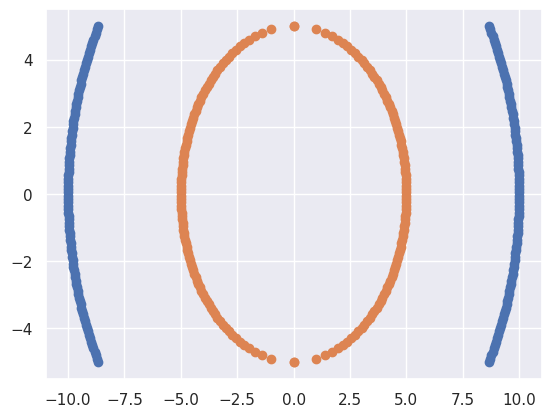

In [36]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [39]:
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y'] = 1
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [40]:
df.tail()

,X1,X2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


In [41]:
df['X1_Square']=df['X1']**2
df['X2_Square']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [42]:
# Independent and Dependent features
X = df[['X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25,random_state = 42)

In [44]:
X_train.shape

(300, 3)

In [45]:
!pip install plotly

In [48]:
import plotly.express as px
df['X1+X2'] = df['X1'] + df['X2']
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1+X2', color='Y')
fig.show()
plt.show()